# KNN Classification
- 100 random values [0,1]
- First 50: x≤0.5→Class1, else→Class2
- Test k=1,2,3,4,5,20,30

## How This Implementation Works

This program implements the k-Nearest Neighbors algorithm to satisfy the given requirements:

1. **Data Generation**:
   - Generate 100 random values between [0,1] using numpy's random function
   - Set a random seed (42) for reproducibility

2. **Data Preparation**:
   - Split data into training (first 50 points) and testing (remaining 50 points)
   - Label training points according to the rule: if x≤0.5 then Class1, else Class2

3. **KNN Algorithm Implementation**:
   - For each test point, calculate distance to all training points
   - Sort distances to find k-nearest neighbors
   - Take a vote among these k neighbors to determine the class
   - Assign the majority class to the test point

4. **Testing Different k Values**:
   - Try k=1, k=5, and k=30 as representative values
   - For each k, classify all test points and count results by class

5. **Visualization**:
   - Plot training data on one level (y=0), colored by class (blue=Class1, red=Class2)
   - Plot test data on another level (y=1), colored by predicted class
   - This visualization helps assess how well the algorithm classified test points

This implementation directly addresses the question requirements by labeling the first 50 points according to the rule and using KNN to classify the remaining points with different k values.

k=1: Class1=25, Class2=25
k=5: Class1=24, Class2=26


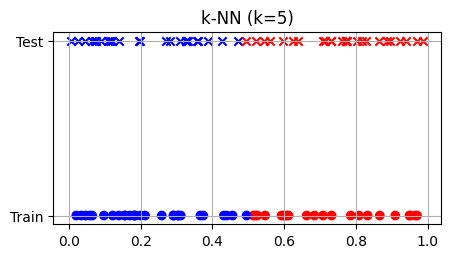

k=30: Class1=25, Class2=25


In [4]:
import numpy as np, matplotlib.pyplot as plt
from collections import Counter

# Setup
np.random.seed(42)
data = np.random.rand(100)
x_train, x_test = data[:50], data[50:]
y_train = ["Class1" if x <= 0.5 else "Class2" for x in x_train]

# KNN function
def knn(x, k):
    votes = [y for _, y in sorted([(abs(x - x_i), y_i) for x_i, y_i in zip(x_train, y_train)])[:k]]
    return Counter(votes).most_common(1)[0][0]

# Classify with different k
for k in [1, 5, 30]:
    pred = [knn(x, k) for x in x_test]
    print(f"k={k}: Class1={pred.count('Class1')}, Class2={pred.count('Class2')}")
    
    # Plot one example (k=5)
    if k == 5:
        c1 = [x for i, x in enumerate(x_test) if pred[i] == "Class1"]
        c2 = [x for i, x in enumerate(x_test) if pred[i] == "Class2"]
        
        plt.figure(figsize=(5, 2.5))
        plt.scatter(x_train, [0]*50, c=["b" if l=="Class1" else "r" for l in y_train], marker="o")
        plt.scatter(c1, [1]*len(c1), c="b", marker="x")
        plt.scatter(c2, [1]*len(c2), c="r", marker="x")
        plt.yticks([0, 1], ["Train", "Test"])
        plt.title(f"k-NN (k={k})")
        plt.grid()
        plt.show()

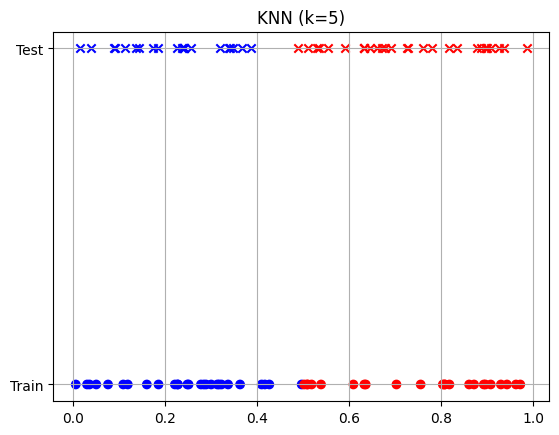

In [3]:
import numpy as np, matplotlib.pyplot as plt
from collections import Counter

x = np.random.rand(100)
train, test = x[:50], x[50:]
labels = ['Class1' if i <= 0.5 else 'Class2' for i in train]

def knn(val):  # k = 5
    nearest = sorted([(abs(val - t), l) for t, l in zip(train, labels)])[:5]
    return Counter([l for _, l in nearest]).most_common(1)[0][0]

pred = [knn(i) for i in test]
c1 = [i for i, p in zip(test, pred) if p == 'Class1']
c2 = [i for i, p in zip(test, pred) if p == 'Class2']

plt.scatter(train, [0]*50, c=['b' if l=='Class1' else 'r' for l in labels])
plt.scatter(c1, [1]*len(c1), c='b', marker='x')
plt.scatter(c2, [1]*len(c2), c='r', marker='x')
plt.yticks([0, 1], ['Train', 'Test'])
plt.title('KNN (k=5)')
plt.grid()
plt.show()
